# Classifying plants

Edinburgh is a great area for foraging vegetables. The problem is, I'm not a very experienced forager and I'd like to have a computer program tell me whether the plant I have found is edible or not. 

I'm not really sure I'll ever be ready to entrust my life to my code, but I'll show you how one could theoretically do this.

We're going to start with a classic dataset from [taxonomy](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf) - we're going to use statistics about plants to group them into three possible classes:
- iris setosa
- iris versicolor
- iris virginica

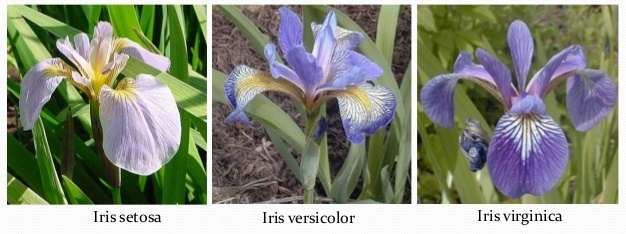

Specifically, we're going to use sepal and petal length/width to assign them to their respective taxonomies:

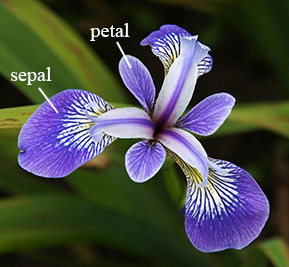


In [20]:
# import some libraries that are going to help us do some data plotting/processing
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

The first question to ask is, what does the data look like? For this we're going to use one of my favourite python libraries, `pandas`. `pandas` is kind of like a drop-in for Excel spreadsheets - it lets us load in `.csv` files and manipulate them as Python objects.

In [31]:
# pandas is a useful framework for importing data into Python objects that we can play with programmatically 
data = pd.read_csv('iris-species/Iris.csv')
data.head(5) # print the first 5 rows of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We're going to write a function that takes as input the features of the plant and outputs a species:

```python
def classify_plant(sepal_length, sepal_width, petal_length, petal_width):
    # some code goes here
    return species
```

We want to evaluate how good our function is at classifying plants by giving it some inputs that we _already know_ the correct answer to. For that reason, we're going to hold back some of the rows of the data and save them for later (we'll call this the _test dataset_). The values that we are allowed to look at are called the _training dataset_. 

However, we can't just take the first 80% of rows from the dataset and use them as our training data because we want to be sure that the class balance is roughly the same in the training and test datasets. To do this automatically I'm going to use another handy Python library, so you can ignore the following cell:

In [41]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

Now we need a way to evaluate the function that we write. To do that, we'll return a score which is the percentage of rows we guessed correctly from the test set.

I'll show you an example of how to do this with a very naive function below.

In [46]:
# naive function - always classify the plant as iris setosa no matter what the input is
def classify_plant(sepal_length, sepal_width, petal_length, petal_width):
    return 'Iris-setosa'

def evaluate_function(classifier, test_set):
    correct = 0
    for index, row in test_set.iterrows(): # this lets us loop over the rows in the test set
        guess = classify_plant(row['SepalLengthCm'], row['SepalWidthCm'],row['PetalLengthCm'],row['PetalWidthCm'])
        
        if guess == row['Species']:
            correct = correct + 1
            
    percentage_correct = (correct / test_set.shape[0]) * 100.
    return percentage_correct

evaluate_function(classify_plant, test)

30.0

Since there are three classes, always guessing 'setosa' gets us around 30% accuracy. Not a bad start, but we can definitely do better.

### Exercise 1

Write a function `classify_plant` that randomly chooses from the three options. 
Hint: you can use the `numpy` function [`choice`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html).

In [ ]:
def classify_plant(sepal_length, sepal_width, petal_length, petal_width):
    # your code goes here
    
evaluate_function(classify_plant, test)

# A better approach

Ideally we'd like our choice to be informed by statistics about the plant. 

A good start is to plot each of the characteristics against plant species. For example:

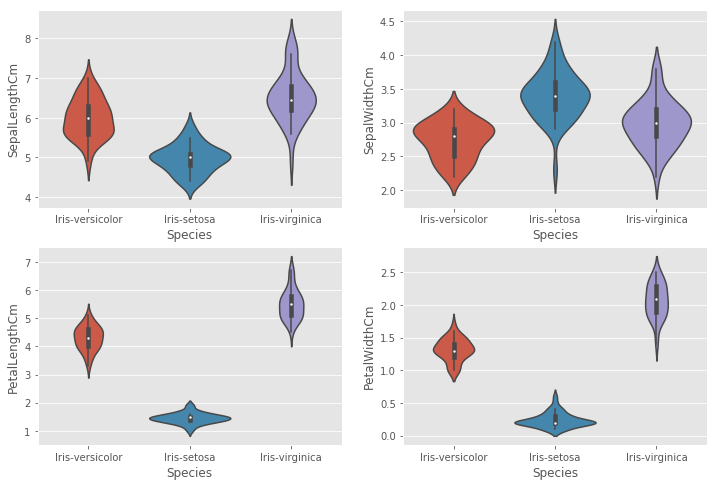

In [61]:
characteristics     = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
num_characteristics = len(characteristics)

fig, axs = plt.subplots(2,2, figsize=(12,8)) # 4 characteristics, so we're going to make 4 plots
axs      = axs.ravel()                            # you can ignore this, but it turns each plot into a list

for i in range(num_characteristics):
    sns.violinplot(x="Species", y=characteristics[i],ax=axs[i], data=train)
    
plt.show()

What we're looking for is a particularly clearly separable feature of the plants. For instance, trying to separate plants based on sepal width looks very hard, whereas separating by petal length looks comparatively easy.

To make this point clear: imagine we are given a single input: `sepal_length = 3.0`. If you draw a line across the sepal length plot at 3.0 it isn't exactly clear which class the plant belongs to. On the other hand, if we are given `petal_length = 1.5` then we can be reasonably sure the plant is iris setosa.

So, let's start by classifying plants based solely on their petal length.

One way to write this programmatically would be to take the average petal length of each species. When we receive a new input, we classify it based on which mean petal length it is closest to. This is called a _nearest neighbour_ approach.

Here is how we can get the mean petal length of all of the plants in the training set which belong to Iris setosa:

In [68]:
setosa      = train[train['Species'] == 'Iris-setosa']
setosa_mean = setosa['PetalLengthCm'].mean()

print(setosa_mean)

1.4560975609756097


### Exercise 2

Get the mean petal length of the other two plant species from the training set. 

In [ ]:
# your code goes here

### Exercise 3

Write a function `classify_plant` that classifies a plant by figuring out which mean it is closest to. Hint: you may want to use the built-in function `abs()` to help you identify the distance between your new point and the mean.

In [ ]:
def classify_plant(sepal_length, sepal_width, petal_length, petal_width):
    # your code goes here
    
evaluate_function(classify_plant, test)

### Exercise 4 (hard) 

We're going to write one last extension to your classifier. The above classifier only considered a single feature (petal length). Write a new classifier which gets the sum of distances from the means of all four features and chooses the class whose total distance is smallest. 


In [ ]:
def classify_plant(sepal_length, sepal_width, petal_length, petal_width):
    # your code goes here
    
evaluate_function(classify_plant, test)

Congratulations, you now know enough about artificial intelligence to get startup funding from a Sicilon Valley-based Venture Capitalist.